___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [2]:
# IMPORTS HERE
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-06-14 15:54:22.811150: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 15:54:22.814659: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 15:54:22.856583: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 15:54:23.800270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [3]:
# CODE HERE
df = pd.read_csv('Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [6]:
# CODE HERE
df.columns = ['Value']

In [8]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

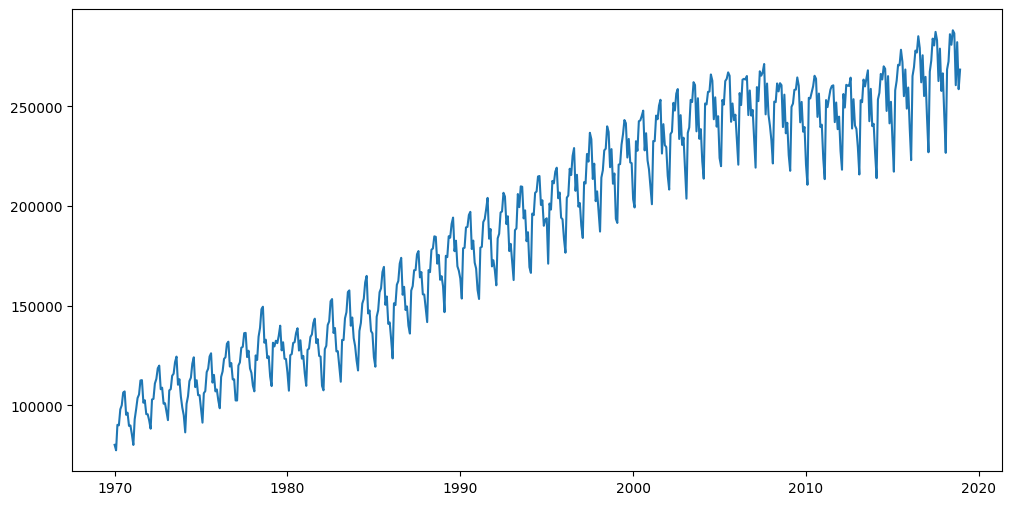

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'])

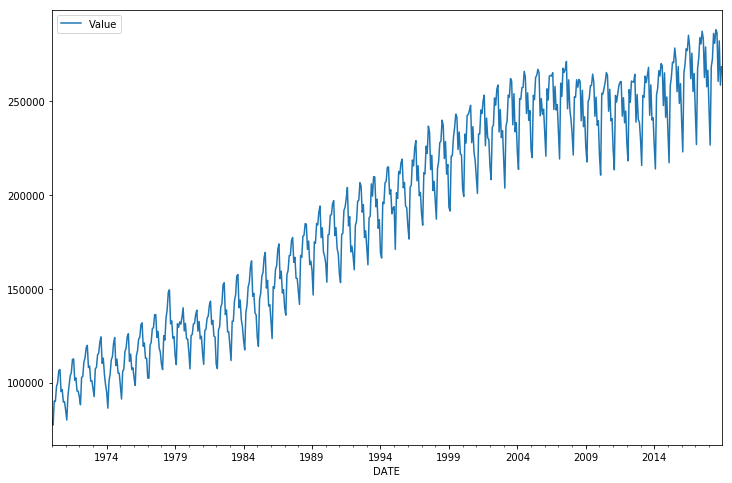

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

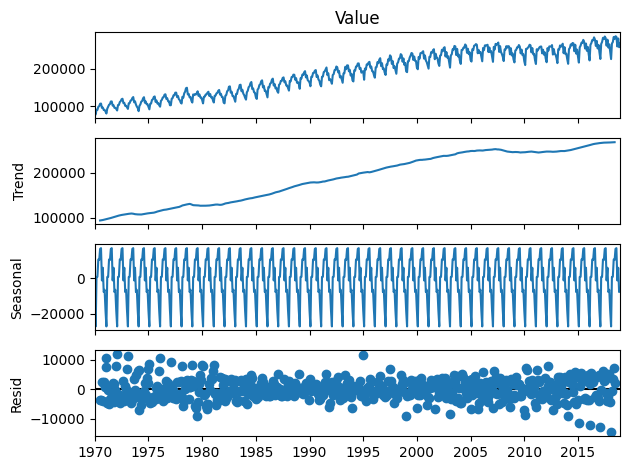

<Figure size 1200x800 with 0 Axes>

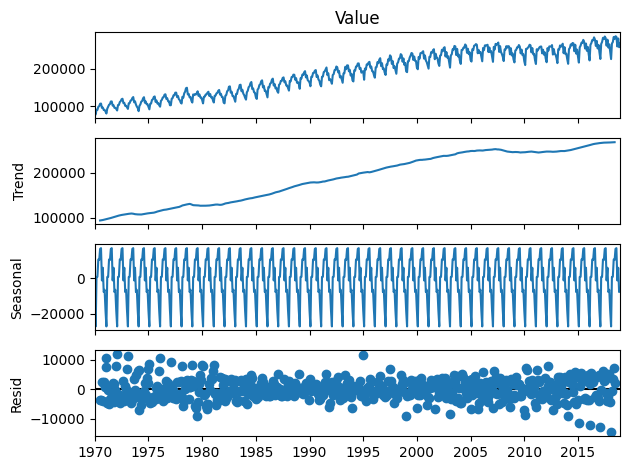

In [17]:
# CODE HERE
result = seasonal_decompose(df['Value'], model='additive', period=12)
plt.figure(figsize=(12, 8))
result.plot()

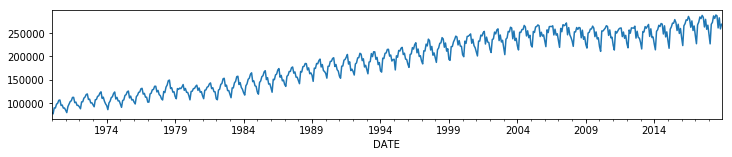

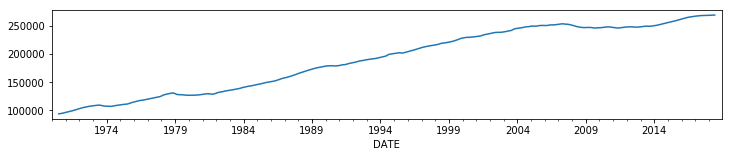

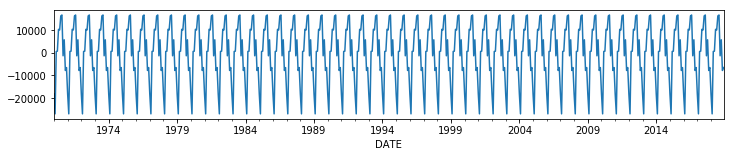

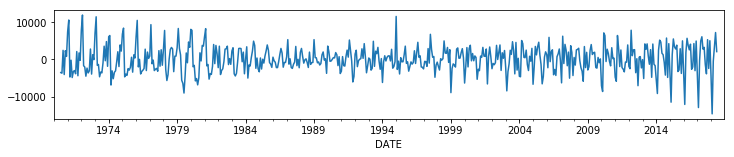

## Train Test Split

**TASK: Figure out the length of the data set**

In [18]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [19]:
# CODE HERE
test_size = 12
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

In [15]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [22]:
# CODE HERE
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [25]:
scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': (0, 1)}

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [26]:
#CODE HERE
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [27]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [29]:
# CODE HERE

history = model.fit(generator, epochs=20)

Epoch 1/20
 40/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1930

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


218/564 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0637

564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0337
Epoch 2/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0067
Epoch 3/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0043
Epoch 4/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0031
Epoch 5/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0019
Epoch 6/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0017
Epoch 7/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014
Epoch 8/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0013
Epoch 9/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014
Epoch 10/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0013
Epoch 11/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0012
Epoch 12/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.7724e-04
Epoch 13/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0011
Epoch 14/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.3438e-04
Epoch 15/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss:

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

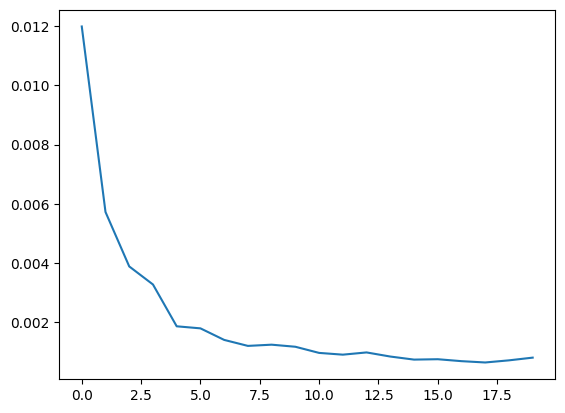

In [30]:
# CODE HERE
plt.plot(history.history['loss'])

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [31]:
# CODE HERE
first_eval_batch = scaled_train[-2*n_input:]
first_eval_batch

array([[0.77292152],
       [0.69351266],
       [0.89425491],
       [0.91572217],
       [0.95535514],
       [0.95068151],
       [0.98959986],
       [0.96126745],
       [0.87944793],
       [0.94410222],
       [0.84664675],
       [0.89249694],
       [0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [32]:
# CODE HERE
test_generator = TimeseriesGenerator(first_eval_batch, first_eval_batch, length=12, batch_size=1)
predictions = model.predict(test_generator)
print(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0.80284435]
 [0.74304855]
 [0.9038481 ]
 [0.93847376]
 [0.9769596 ]
 [0.97968614]
 [1.0050347 ]
 [0.9824721 ]
 [0.9189877 ]
 [0.9558546 ]
 [0.8810503 ]
 [0.9058322 ]]


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [33]:
#CODE HERE
predictions = scaler.inverse_transform(predictions)
predictions

array([[245959.81],
       [233408.64],
       [267160.62],
       [274428.56],
       [282506.78],
       [283079.1 ],
       [288399.78],
       [283663.88],
       [270338.44],
       [278076.8 ],
       [262375.3 ],
       [267577.1 ]], dtype=float32)

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [34]:
test.values.flatten()

array([245695., 226660., 268480., 272475., 286164., 280877., 288145.,
       286608., 260595., 282174., 258590., 268413.])

In [35]:
pd.date_range(start='2018-01-01', periods=12, freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [36]:
# CODE HERE
dates = pd.date_range(start='2018-01-01', periods=12, freq='MS')
dates
results_df = pd.DataFrame({
    'Values': test.values.flatten(),
    'Predictions': predictions.flatten(),
    'Date': dates

})

results_df = results_df.set_index('Date')
results_df

,Values,Predictions
Date,,
2018-01-01,245695.0,245959.812500
2018-02-01,226660.0,233408.640625
2018-03-01,268480.0,267160.625000
2018-04-01,272475.0,274428.562500
2018-05-01,286164.0,282506.781250
2018-06-01,280877.0,283079.093750
2018-07-01,288145.0,288399.781250
2018-08-01,286608.0,283663.875000
2018-09-01,260595.0,270338.437500


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

Text(0, 0.5, 'Value')

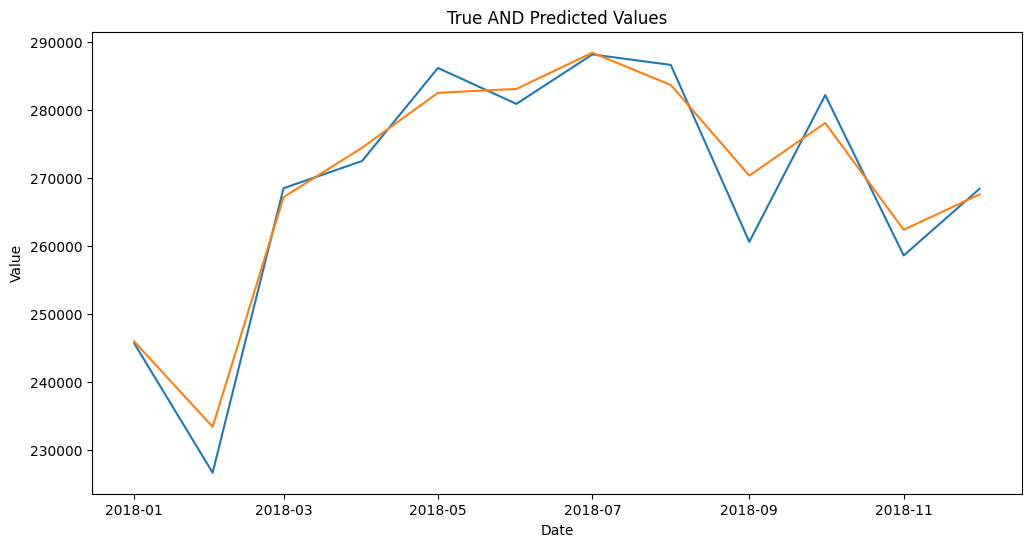

In [38]:
# CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Values'], label='True Values')
plt.plot(results_df.index, results_df['Predictions'], label='Predictions')
plt.title('True AND Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')

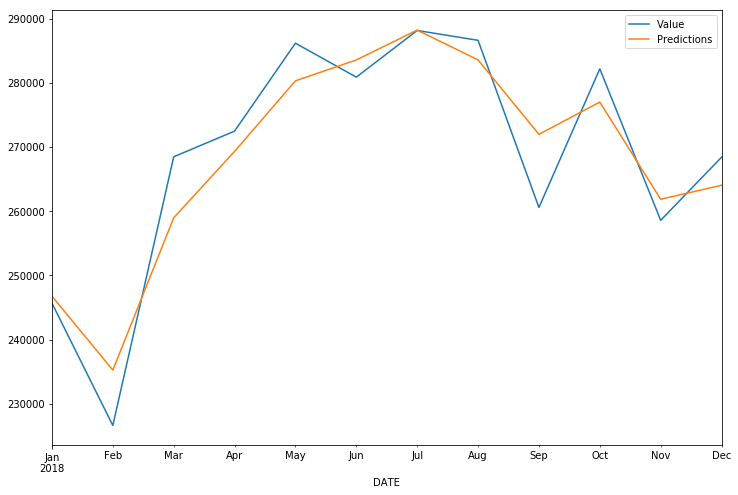

# Saving Models

**TASK: Optional, Save your model!**

In [41]:
model.save("LSTM_model.keras")

In [42]:
from tensorflow.keras.models import load_model
model = load_model('LSTM_model.keras')